### 1.Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

### 2.Read Data_set

In [2]:
# Đường dẫn file
file_path=f"../data_danhgia_module_router_generate/eval_query_router.xlsx"

df = pd.read_excel(file_path, engine="openpyxl")
print(df.head(5))

                                    user_Query  expected_Domain  \
0                    Xin chào, bạn khỏe không?                0   
1         Chào buổi sáng, hôm nay thế nào rồi?                0   
2    Hey! Lâu rồi không gặp, dạo này ổn không?                0   
3  Chào bạn! Hy vọng bạn có một ngày tốt lành.                0   
4                    Hello! Có ai ở đây không?                0   

   result_Domain_Prompt  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  


### 3.Evaluation

In [3]:
accuracy = accuracy_score(df["expected_Domain"], df["result_Domain_Prompt"])
f1 = f1_score(df["expected_Domain"], df["result_Domain_Prompt"], average='weighted')
precision = precision_score(df["expected_Domain"], df["result_Domain_Prompt"], average='weighted')
recall = recall_score(df["expected_Domain"], df["result_Domain_Prompt"], average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9460
F1 Score: 0.9459
Precision: 0.9475
Recall: 0.9460


C:\Users\hdang\AppData\Local\Temp\ipykernel_20796\528019731.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x='Metric', y='Score', palette='viridis')


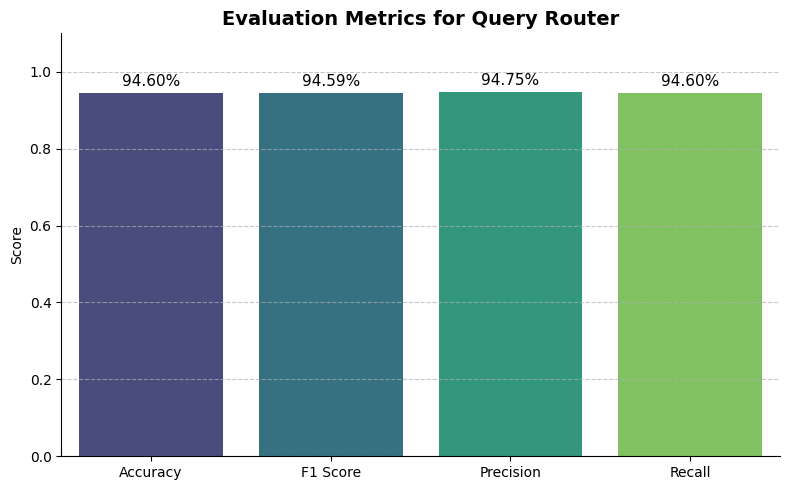

In [6]:
# Tạo DataFrame cho trực quan hóa
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [accuracy, f1, precision, recall]
})

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(data=metrics_df, x='Metric', y='Score', palette='viridis')

# Thêm nhãn số trên cột
for index, row in metrics_df.iterrows():
    plt.text(index, row['Score'] + 0.01, f"{row['Score']:.2%}", ha='center', va='bottom', fontsize=11)

# Tùy chỉnh biểu đồ
plt.title("Evaluation Metrics for Query Router", fontsize=14, fontweight='bold')
plt.ylim(0, 1.1)
plt.ylabel("Score")
plt.xlabel("")
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

plt.tight_layout()
plt.show()